# Advance Linear Regression

#### Import all the Libraries
- Pandas
- Numpy
- Seaborn plot
- Matplotlib plat
- SkitLearn Linear regression
- SkitLearn RSquare and Mean Squared error

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.model_selection import KFold, cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv("advertising.csv")
print(df.shape)
df.head()

(200, 4)


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## Simple Linear Regression
#### Comparing only TV and sales

In [7]:
tv_sales_df = df[["TV", "Sales"]]
print(tv_sales_df.shape)
tv_sales_df.head()

(200, 2)


,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9


<Axes: xlabel='TV', ylabel='Sales'>

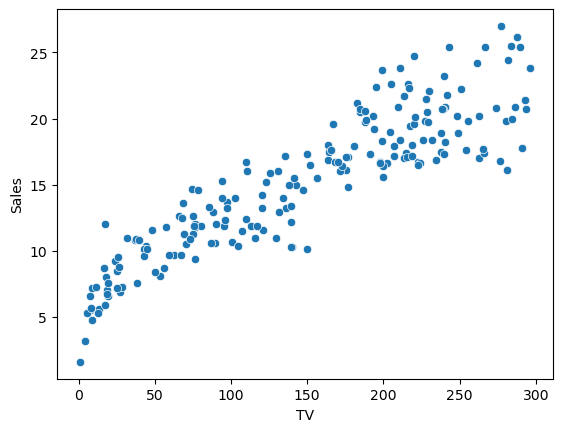

In [79]:
sns.scatterplot(tv_sales_df, x="TV", y="Sales")

In [8]:
X = np.array(tv_sales_df["TV"]).reshape(-1,1)
y = np.array(tv_sales_df["Sales"]).reshape(-1,1)
print(X[:5])
print(y[:5])

[[230.1]
 [ 44.5]
 [ 17.2]
 [151.5]
 [180.8]]
[[22.1]
 [10.4]
 [12. ]
 [16.5]
 [17.9]]


## Building the Regression model

In [9]:
reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

In [15]:
scores = cross_val_score(reg, X, y, scoring='r2', cv=10)
scores      

array([0.83283252, 0.72444029, 0.77846467, 0.87955404, 0.76065371,
       0.88067487, 0.83508629, 0.66102314, 0.73611831, 0.83119639])

In [16]:
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
scores = cross_val_score(reg, X, y, scoring='r2', cv=folds)
scores 

array([0.81780623, 0.65203854, 0.87622071, 0.71398583, 0.75638057,
       0.59031587, 0.82853489, 0.87631843, 0.84001306, 0.84470905])

In [18]:
scores = cross_val_score(reg, X, y, scoring='neg_mean_squared_error', cv=10)
scores

array([-4.09160786, -6.4741306 , -6.27487185, -3.15868021, -4.59116447,
       -3.30481392, -5.76364755, -8.80725443, -5.27612316, -5.70613589])

In [11]:
# init the y predict variable
y_pred = reg.predict(X)

### R Square value

In [12]:
### Get the R2_score
r2_score(y_true=y, y_pred=y_pred)

0.8121757029987414

#### Plot the graph

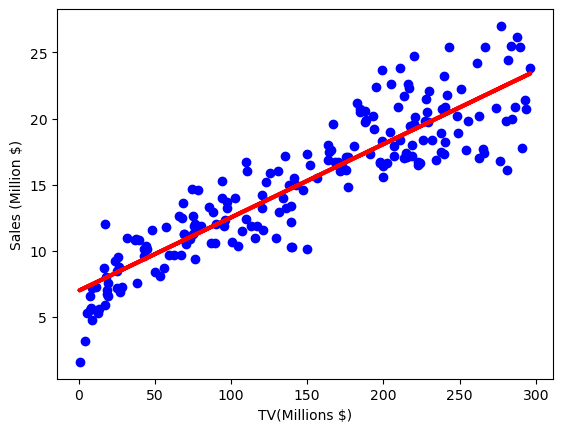

In [14]:
plt.scatter(X, y, color= 'blue')
plt.plot(X, y_pred, color= 'red', linewidth=3)
plt.xlabel("TV(Millions $)")
plt.ylabel("Sales (Million $)")
plt.show()

#### Get the Coefficient and intercept for TV vs Sales
$\hat{y_{i}}= b_{0} + b_1x_{i}$<br/>
$\hat{y_{i}}= 6.98 + 0.05x_{i}$

In [16]:
print(reg.coef_)
print(reg.intercept_)

[[0.05546477]]
[6.97482149]


### Compute coefficient using normal equation
#### Regression Equation
$\hat{y_i} = b_{0} + b_{1}{x_i}$<br>
where slope of trend line is calculated as:<br>
$b_{1}=\frac{\sum (x_i-\bar{x})*(y_i-\bar{y})}{\sum (x_i-\bar{x})^{2}}$<br>
and the intercept is computed as:<br>
$b_{0}=\bar{y}-b_{1}\bar{x}$

In [52]:
X_values = tv_sales_df["TV"].values
y_values = tv_sales_df["Sales"].values

mean_x_values = np.mean(X_values)
mean_y_values = np.mean(y_values)

n = len(X_values)

#### Computing the numerator and Denomenator
$b_{1}=\frac{\sum (x_i-\bar{x})*(y_i-\bar{y})}{\sum (x_i-\bar{x})^{2}}$<br>
$b_{0}=\bar{y}-b_{1}\bar{x}$

In [59]:
numerator = 0
denomenator = 0

for i in range(n):
    # computing and adding the numerator to its previous value
    numerator += (X_values[i] - mean_x_values) * (y_values[i] - mean_y_values)
    # computing and adding the denomenator to its previous value
    denomenator += (X_values[i] - mean_x_values) ** 2
b1 = numerator / denomenator
b0 = mean_y_values - (b1 * mean_x_values)

#Coeffecients are: 
print(f"Coefficients:\t{b1}\nintercept:\t{b0}")

Coefficients:	0.05546477046955879
intercept:	6.974821488229903


### Compute coefficient using Matrix
$\widehat{\beta}=(X^{T}.X)^{-1}.X^{T}.Y$

In [81]:
# We are using the numpy to create 2-d numpy array from two 1d-arrays and create x_mat
X_mat = np.vstack((np.ones(len(X_values)), X_values)).T
X_mat[:5]
X_mat.shape

(200, 2)

In [82]:
y_values.shape


(200,)

In [83]:
X_mat_T = X_mat.T
# X_T * X
X_mat_multi = X_mat_T.dot(X_mat)
beta_hat = np.linalg.inv(X_mat_multi).dot(X_mat_T).dot(y_values)
beta_hat

array([6.97482149, 0.05546477])

### Gradient Descend - Finding intercept and coefficient

In [84]:
tv_sales_df_std = (tv_sales_df - tv_sales_df.mean()) / tv_sales_df.std()
tv_sales_df_std.head()

,TV,Sales
0,0.967425,1.319009
1,-1.194379,-0.895268
2,-1.512360,-0.592461
3,0.051919,0.259184
4,0.393196,0.524140


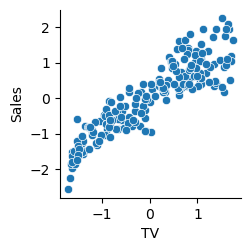

In [85]:
sns.pairplot(tv_sales_df_std, x_vars=["TV"], y_vars=["Sales"])
plt.show()

In [86]:
def gradient(X, y, m_current=0, c_current=0, iters=100000, learning_rate=0.001):
    N = float(len(y))    
    gd_df = pd.DataFrame( columns = ['m_current', 'c_current','cost'])    
    for i in range(iters):        
        y_current = (m_current * X) + c_current        
        cost = sum([data**2 for data in (y-y_current)]) / N        
        m_gradient = -(2/N) * sum(X * (y - y_current))        
        c_gradient = -(2/N) * sum(y - y_current)        
        m_current = m_current - (learning_rate * m_gradient)        
        c_current = c_current - (learning_rate * c_gradient)        
        gd_df.loc[i] = [m_current,c_current,cost]    
    return(gd_df)

In [122]:
def cost_function(X, y, weights):
    scores = np.dot(X, weights)
    h = sigmoid(scores)
    return (-1/len(df)) * sum( (y*np.log(h)) + (1-y)*(np.log(1-h)) )

# Defining Sigmoid Function
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))

def gradient_descent_new(X, y, learning_rate, nbr_steps):
    intercept = np.ones((X.shape[0], 1))
    X = np.hstack((intercept, X))
    weights = np.zeros(X.shape[1])
    m = len(df)
    for step in range(nbr_steps):
        scores = np.dot(X, weights)
        hypothesis = sigmoid(scores)
        output_error_signal = hypothesis - y
        
        gradient = np.dot(X.T, output_error_signal)
        
        weights -= (learning_rate/m) * gradient
        
    return weights

In [124]:
def gradient_descent_new2(X,Y):
    m = 0
    c = 0

    L = 0.0001  # The learning Rate
    epochs = 100000  # The number of iterations to perform gradient descent

    n = float(len(X)) # Number of elements in X

    # Performing Gradient Descent 
    for i in range(epochs): 
        Y_pred = m*X + c  # The current predicted value of Y
        D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
        D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
        m = m - L * D_m  # Update m
        c = c - L * D_c  # Update c
    return (m,c)

In [123]:
weights = gradient_descent_new2(tv_sales_df_std["TV"], tv_sales_df_std["Sales"])
print(weights)

(0.9012079112535055, -3.8857245199253414e-16)


In [87]:
gradient_area = gradient(tv_sales_df_std["TV"], tv_sales_df_std["Sales"])

In [88]:
gradient_area.tail()

,m_current,c_current,cost
99995,0.901208,-3.885287e-16,0.186885
99996,0.901208,-3.885547e-16,0.186885
99997,0.901208,-3.885808e-16,0.186885
99998,0.901208,-3.884726e-16,0.186885
99999,0.901208,-3.884987e-16,0.186885


<Axes: xlabel='index'>

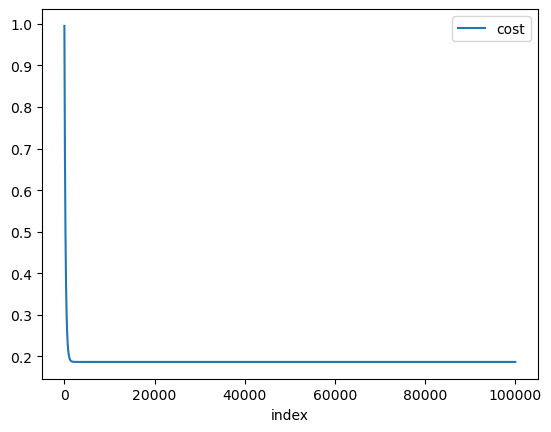

In [89]:
gradient_area.reset_index().plot.line(x="index", y=["cost"])


In [125]:
print(gradient_area[-1:])

       m_current     c_current      cost
99999   0.901208 -3.884987e-16  0.186885


## Multiple Linear Regression

In [134]:
df_mlr = df
y_mlr = np.array(df_mlr["Sales"]).reshape(-1,1)
X_mlr = df_mlr[["TV", "Newspaper", "Radio"]]

#### TV vs Sales

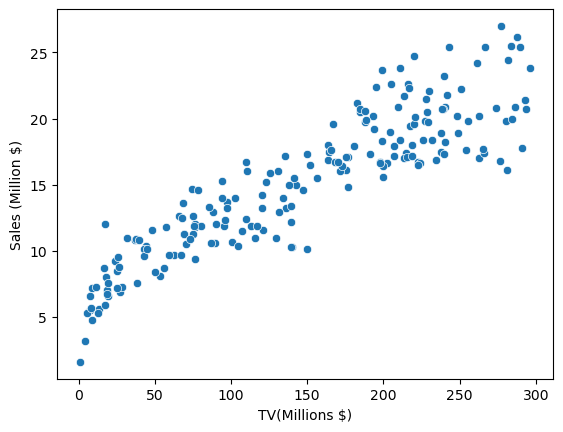

In [140]:
sns.scatterplot(df_mlr, x="TV", y="Sales")
# plt.plot(X, y_pred, color= 'red', linewidth=3)
plt.xlabel("TV(Millions $)")
plt.ylabel("Sales (Million $)")
plt.show()

#### Newpaper vs Sales

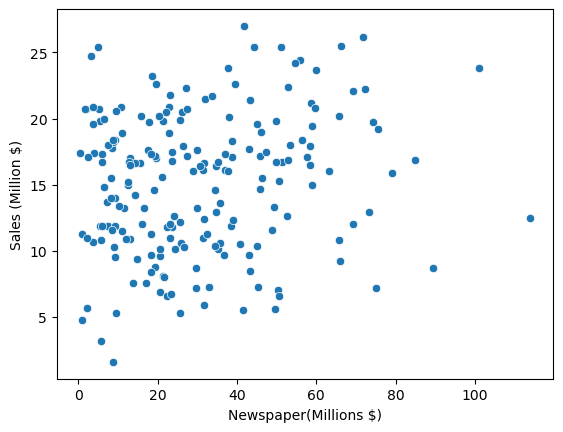

In [152]:
sns.scatterplot(df_mlr, x="Newspaper", y="Sales")
# plt.plot(X, y_pred, color= 'red', linewidth=3)
plt.xlabel("Newspaper(Millions $)")
plt.ylabel("Sales (Million $)")
plt.show()

#### Radio vs Sales

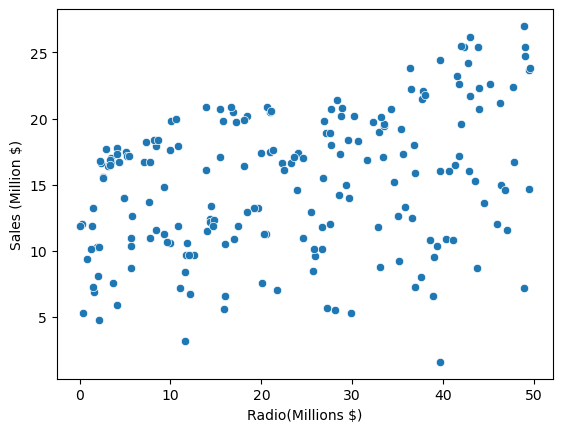

In [151]:
sns.scatterplot(df_mlr, x="Radio", y="Sales")
# plt.plot(X, y_pred, color= 'red', linewidth=3)
plt.xlabel("Radio(Millions $)")
plt.ylabel("Sales (Million $)")
plt.show()

In [142]:
reg_mlr = LinearRegression()
reg_mlr.fit(X_mlr, y_mlr)

LinearRegression()

In [144]:
y_mlr_pred = reg_mlr.predict(X_mlr)

In [145]:
r2_score(y_mlr,y_mlr_pred)

0.9025912899684558

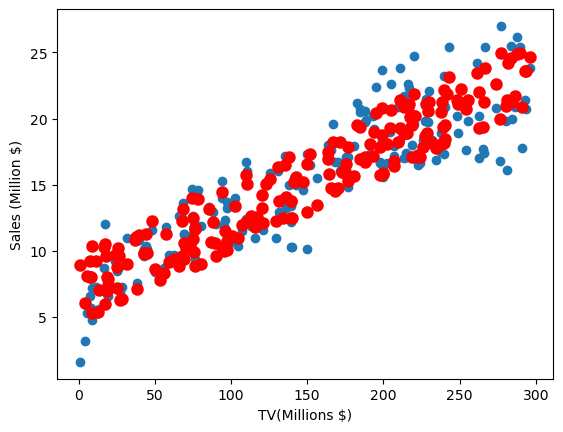

In [150]:
plt.scatter(X_mlr["TV"], y_mlr)
plt.scatter(X_mlr["TV"], y_mlr_pred, color= 'red', linewidth=3)
plt.xlabel("TV(Millions $)")
plt.ylabel("Sales (Million $)")
plt.show()

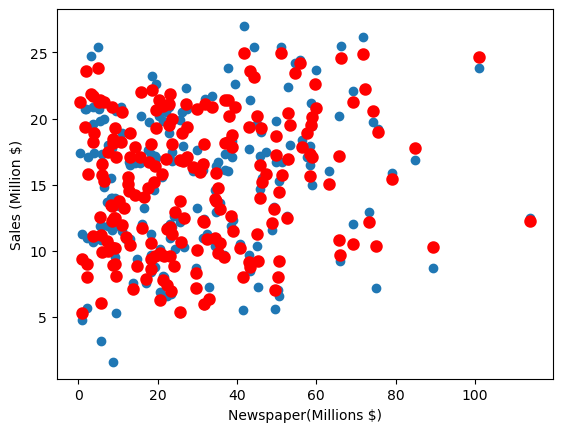

In [153]:
plt.scatter(X_mlr["Newspaper"], y_mlr)
plt.scatter(X_mlr["Newspaper"], y_mlr_pred, color= 'red', linewidth=3)
plt.xlabel("Newspaper(Millions $)")
plt.ylabel("Sales (Million $)")
plt.show()

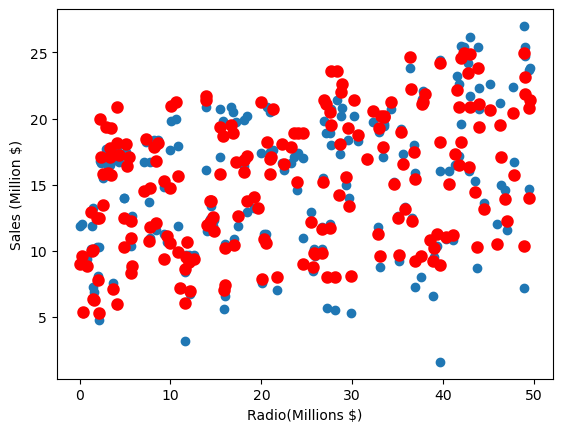

In [154]:
plt.scatter(X_mlr["Radio"], y_mlr)
plt.scatter(X_mlr["Radio"], y_mlr_pred, color= 'red', linewidth=3)
plt.xlabel("Radio(Millions $)")
plt.ylabel("Sales (Million $)")
plt.show()

#### Coefficient and Intercept

In [155]:
print(f"Intercept: {reg_mlr.intercept_}\nCoeffecient: {reg_mlr.coef_}")

Intercept: [4.62512408]
Coeffecient: [[0.05444578 0.00033566 0.10700123]]


### RSS, MSE and RMSE

In [156]:
rss = np.sum(np.square(y_mlr - y_mlr_pred))
print(f"RSS is {rss}")

# mse = rss / len(y_mlr)
mse = mean_squared_error(y_mlr, y_mlr_pred)
print(f"MSE is {mse}")

rmse = mse ** 0.5
print(f"RMSE is {rmse}")

RSS is 541.2012295254632
MSE is 2.706006147627316
MSE -> 2.706006147627316
RMSE is 1.6449942697855564


### Residuals analysis

In [162]:
y_mlr_res = y_mlr - y_mlr_pred
y_mlr_res.shape

(200, 1)

In [163]:
data = pd.DataFrame(y_mlr_res, columns =['res']) 

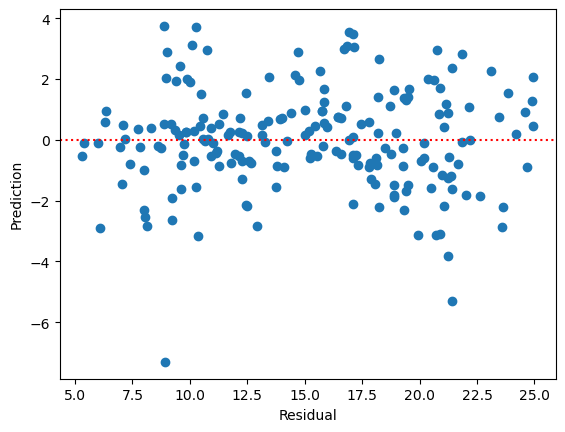

In [164]:
plt.scatter(y_mlr_pred, data["res"])
plt.axhline(y=0, color="r", linestyle=":")
plt.xlabel("Residual")
plt.ylabel("Prediction")
plt.show()

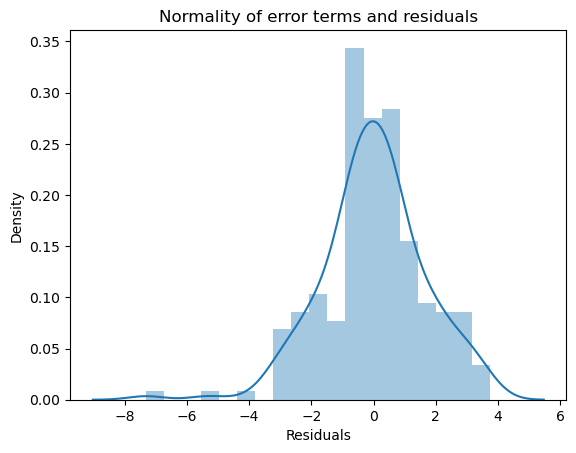

In [165]:
p = sns.distplot(y_mlr_res, kde=True)

p = plt.title("Normality of error terms and residuals")
plt.xlabel("Residuals")
plt.show()

### Compute coefficient using Matrix
$\widehat{\beta}=(X^{T}.X)^{-1}.X^{T}.Y$

In [170]:
# Create the matrix
X_mlr_mat = np.vstack((np.ones(len(X_mlr)), X_mlr.T)).T
X_mlr_mat.shape

(200, 4)

In [171]:
beta_hat_mlr = np.linalg.inv(X_mlr_mat.T.dot(X_mlr_mat)).dot(X_mlr_mat.T).dot(y_mlr)

In [172]:
beta_hat_mlr

array([[4.62512408e+00],
       [5.44457803e-02],
       [3.35657922e-04],
       [1.07001228e-01]])